## 4.1 K-means Clustering

### Clustering is the act of grouping datapoints that resemble one another in some parameter space. Let's start with k-means clustering, a widely used technique.


### 1. Choose the number of clusters $k$
### 2. Initialize $k$ centroids randomly.
### 3. Go through all datapoints and assign them to the centroid that is nearest.
### 4. Re-position each centroid. For each one, calculate the average all those data points that belong to that centroid. That mean is the new position.
### Repeat steps 3 and 4 until new position of centroid doesn't change by some threshold.
### k means ++ might lead to faster convergence, if instead of randomly assigning the centroids initially, the maximally distant data point to a first random centroid is chosen as the second centroid, and so on. We will do that and well, and explore convergence.

In [181]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [182]:
#our dataset
np.random.seed(33)
x = [5 + np.random.uniform(-2,2) for i in range(20)] #can span 3-7
y = [5 + np.random.uniform(-2,2) for i in range(20)] 
x += [6 + np.random.uniform(-1,1) for i in range(20)] #can span 5-7 for some overlap
y += [6 + np.random.uniform(-1,1) for i in range(20)]
x += [8 + np.random.uniform(0,2) for i in range(20)] #outlier cluster
y += [8 + np.random.uniform(0,2) for i in range(20)]

In [158]:
def initialize_centroids(k, x, y):
    xmin, ymin, xmax, ymax = min(x), min(y), max(x), max(y)
    lim = [xmin, ymin, xmax, ymax]
    xmin, ymin, xmax, ymax = lim[0], lim[1], lim[2], lim[3]
    centroids = []
    for i in range(k):
        randx = np.random.uniform(xmin, xmax)
        randy = np.random.uniform(ymin, ymax)
        centroids.append([randx, randy])
    return centroids

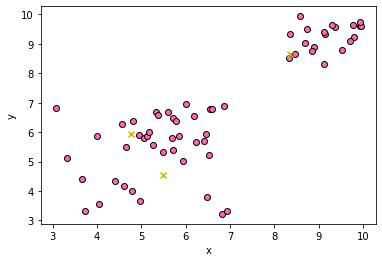

In [167]:
plt.scatter(x, y, marker = 'o', facecolor = 'hotpink', edgecolor = 'k', label = 'data')
centroids =  initialize_centroids(3, x, y)
for pair in centroids:
    plt.scatter([pair[0]], [pair[1]], c = 'y', marker = 'x', label = 'centroids')
plt.xlabel('x')
plt.ylabel('y');

In [163]:
def get_dist(x, y, xq, yq):
    return (y-yq)**2 + (x-xq)**2 #euclidean distance squared
    #(no need to take square root to avoid doing extra calculation)

def generate_centroids(k, x, y, labels):
    centroids = []
    for i in range(k):
        #i is the centroid number and we need to pick the indices from labels
        indices = [j for j in range(len(labels)) if labels[j]==i]
        mean_x = np.mean([x[j] for j in indices])
        mean_y = np.mean([y[j] for j in indices])
        centroids.append([mean_x, mean_y])
    return centroids

def kmeans(k, x, y):
    
    centroids = initialize_centroids(k, x, y) #initial centroids
    labels = [] # a list that will tell us which centroid datapoints belong to
        #it should have length = len(x)
    
    disp_list = [21.]
    disp = 21.
    while disp > 0.001:
    
        labels = []
        for i in range(len(x)):

            xi = x[i]
            yi = y[i]
            min_dist = 10000
            for j in range(k):
                dist = get_dist(xi, yi, centroids[j][0], centroids[j][1])
                if dist < min_dist:
                    min_dist = dist
                    chosen_centroid = j
                else:
                    continue

            labels.append(chosen_centroid)
        new_centroids = generate_centroids(k, x, y, labels)

        disp = np.sum([(centroids[i][0]-new_centroids[i][0])**2 +\
                (centroids[i][1]-new_centroids[i][1])**2 \
                       for i in range(k)])
        disp_list.append(disp)

        centroids = new_centroids
        
    return labels, centroids, disp_list 

#returned the following:
    #what cluster particles belong to
    #location of centroids
    #err

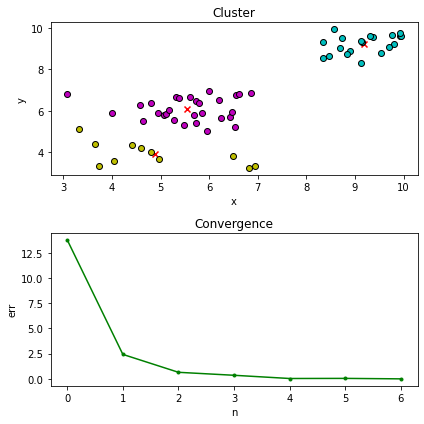

In [161]:
out = kmeans(3, x, y);
labels = out[0]
centroids = out[1]
err = out[2]

fig, [ax0, ax1] = plt.subplots(2, figsize = (6,6))
for pair in centroids:
    ax0.scatter([pair[0]], [pair[1]], c = 'r', marker = 'x', label = 'centroids')
col = ['c', 'm', 'y']
for i in range(len(labels)):
    c = col[labels[i]]
    ax0.scatter([x[i]], [y[i]], marker = 'o', facecolor = c, edgecolor = 'k', label = 'data')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('Cluster')
ax1.set_title('Convergence')
ax1.set_ylabel('err')
ax1.set_xlabel('n')
ax1.plot(err[1:], 'g.-')
plt.tight_layout()

### 4.1.1 Initialize ++

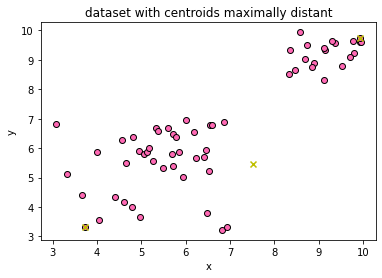

In [179]:
def initialize_centroids_pp(k, x, y):
    centroids = initialize_centroids(1, x, y) #the first centroid will be random
    for i in range(1, k):
        mean = mean_of_prev(centroids)
        xq, yq = mean[0], mean[1]
        dist_list = [(x[i]-xq)**2 + (y[i]-yq)**2 for i in range(len(x))]
        index = dist_list.index(max(dist_list))
        curr_centroid = [x[index], y[index]]
        centroids.append(curr_centroid)
    return centroids

def mean_of_prev(centroids):
    xmean = np.mean([centroids[i][0] for i in range(len(centroids))])
    ymean = np.mean([centroids[i][1] for i in range(len(centroids))])
    return xmean, ymean

plt.scatter(x, y, marker = 'o', facecolor = 'hotpink', edgecolor = 'k', label = 'data')
centroids =  initialize_centroids_pp(3, x, y)
for pair in centroids:
    plt.scatter([pair[0]], [pair[1]], c = 'y', marker = 'x', label = 'centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title('dataset with centroids maximally distant');

## 4.2 Gaussian Mixture Model (GMM)

### If we have a cluster of points, we can under some assumptions imagine that each cluster was created as a result of a Gaussian distribution. So if we have $k$ clusters, we may then think of the dataset as being a collection containing data from $k$ Gaussian distributions.

### Rather than going in detail, we will simply use sci-kit learn's built-in module to execute GMM

In [201]:
from sklearn.mixture import GaussianMixture

##let's use the same data (x,y)
X = np.array([x, y]).T
gm = GaussianMixture(n_components=3, random_state=0).fit(X) 
    #there is an init_params kwd that can be set to k-means, for instance

print('GMM means: {}'.format(gm.means_))

print('\t')

print(gm.predict(X))

GMM means: [[9.17897067 9.23025525]
 [5.52860359 6.07808206]
 [4.93439389 3.86820286]]
	
[1 2 1 2 2 2 1 2 1 1 1 1 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


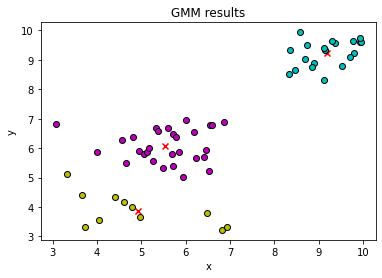

In [200]:
fig, ax = plt.subplots()

for pair in gm.means_:
    ax.scatter([pair[0]], [pair[1]], c = 'r', marker = 'x', label = 'centroids')
    
col = ['c', 'm', 'y']
labels = gm.predict(X)

for i in range(len(x)):
    c = col[labels[i]]
    ax.scatter([x[i]], [y[i]], marker = 'o', facecolor = c, edgecolor = 'k', label = 'data')
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('GMM results');

### Before leaving it at that, let's just gain a sense of the algorithm behind GMM. It is called Expectation Maximization (EM)

### There is the E-step followed by the M-step. In GMM, it is all a matter of estimating the means and variances of the gaussian distributions that we think generated our data. So, in the E-step, we estimate these parameters by looking at the data. The initial estimate could even be totally random. In the M-step, we optimize for these parameters by carrying out MLE.